In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)


In [3]:
# Function to fetch historical price data from Yahoo Finance
def fetch_stock_data(ticker_symbol, start_date, end_date):
        # ticker_symbol: Ticker symbol of the stock.
        # start_date: Start date in 'YYYY-MM-DD' format.
        # end_date: End date in 'YYYY-MM-DD' format.

    stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)
    return stock_data


In [4]:
# Define Parameters
ticker_symbol = 'CSCO'
start_date = dt.datetime.now() - dt.timedelta(days=2*365)
start_date = start_date.strftime('%Y-%m-%d')
end_date = dt.datetime.now() - dt.timedelta(days=1)
end_date = end_date.strftime('%Y-%m-%d')

In [6]:

# Fetch historical price data
stock_data = fetch_stock_data(ticker_symbol, start_date, end_date)
stock_data
# adj_close_prices = stock_data['Adj Close'].values

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-19,43.060001,43.930000,41.020000,41.720001,39.122368,97674600
2022-05-20,41.860001,43.000000,41.520000,42.939999,40.266399,46148700
2022-05-23,43.340000,43.820000,42.939999,43.349998,40.650864,27366600
2022-05-24,43.400002,44.060001,42.500000,43.770000,41.044720,30053900
2022-05-25,43.750000,44.419998,43.189999,44.000000,41.260406,25504600
...,...,...,...,...,...,...
2024-05-10,48.000000,48.099998,47.700001,48.060001,48.060001,12096900
2024-05-13,48.310001,48.820000,48.230000,48.680000,48.680000,15149100
2024-05-14,48.980000,49.180000,48.349998,48.950001,48.950001,17379700


In [13]:
#displays a summary of the DataFrame
stock_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 2022-05-18 to 2024-05-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       501 non-null    float64
 1   High       501 non-null    float64
 2   Low        501 non-null    float64
 3   Close      501 non-null    float64
 4   Adj Close  501 non-null    float64
 5   Volume     501 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.4 KB


<Axes: >

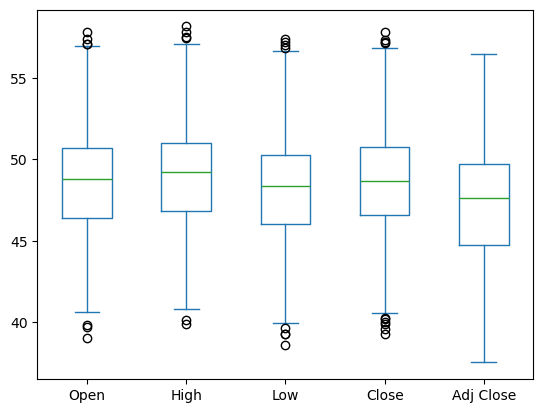

In [15]:
#Checlking for possible outliers in the stock dataset
stock_data[['Open','High','Low','Close','Adj Close']].plot(kind='box')


### Note

There  are no big outtliers to worry about. We can proced the way it is.

In [14]:
# Setting the layout for our plot
layout = go.Layout(
    title='CISCO Stock Prices',  # Title of the plot
    xaxis=dict(
        title='Date',  # Title of the x-axis
        titlefont=dict(
            family='Courier New, monospace',  # Font family for the x-axis title
            size=18,  # Font size for the x-axis title
            color='#7f7f7f'  # Font color for the x-axis title
        )
    ),
    yaxis=dict(
        title='Price',  # Title of the y-axis
        titlefont=dict(
            family='Courier New, monospace',  # Font family for the y-axis title
            size=18,  # Font size for the y-axis title
            color='#7f7f7f'  # Font color for the y-axis title
        )
    )
)

# Preparing the data for the plot
# 'x' contains the dates from the stock_data index
# 'y' contains the closing prices from the stock_data 'Close' column
stock_data2 = [{'x': stock_data.index, 'y': stock_data['Close']}]

# Creating the figure with the specified data and layout
plot = go.Figure(data=stock_data2, layout=layout)


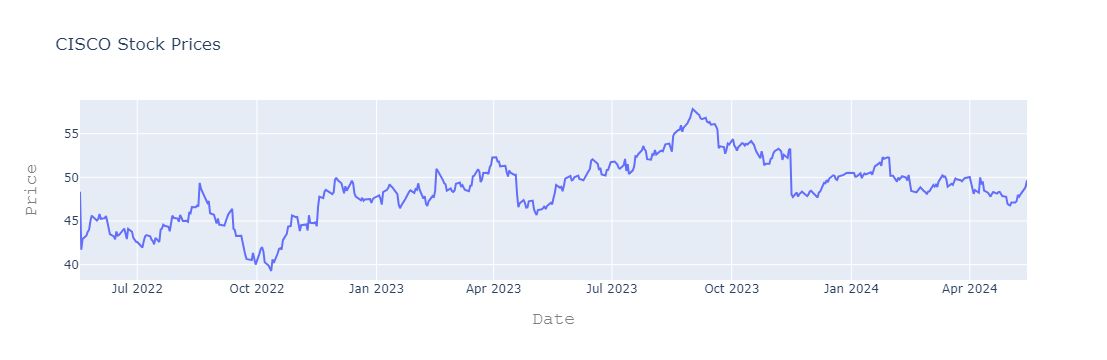

In [18]:
# Plotting the figure offline 

iplot(plot)


In [8]:
# Importing necessary libraries for building the regression model

# Library for splitting dataset into train and test sets
from sklearn.model_selection import train_test_split

# Library for data preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Library for model evaluation metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score


In [35]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-18,50.470001,50.470001,48.209999,48.360001,45.348930,40672700
2022-05-19,43.060001,43.930000,41.020000,41.720001,39.122368,97674600
2022-05-20,41.860001,43.000000,41.520000,42.939999,40.266396,46148700
2022-05-23,43.340000,43.820000,42.939999,43.349998,40.650867,27366600
2022-05-24,43.400002,44.060001,42.500000,43.770000,41.044724,30053900
...,...,...,...,...,...,...
2024-05-09,48.000000,48.090000,47.650002,47.790001,47.790001,12449300
2024-05-10,48.000000,48.099998,47.700001,48.060001,48.060001,12096900
2024-05-13,48.310001,48.820000,48.230000,48.680000,48.680000,15149100


In [9]:
# Split the data into train and test sets

# Convert the datetime index to a numerical format (timestamp)
X = np.array(stock_data.index.map(pd.Timestamp.timestamp)).reshape(-1, 1)

# Extracting the target variable 'Close' from the DataFrame
Y = stock_data['Close']

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)


In [37]:
X_train

array([[1.6619040e+09],
       [1.6837632e+09],
       [1.6818624e+09],
       [1.7019072e+09],
       [1.6599168e+09],
       [1.6856640e+09],
       [1.6600896e+09],
       [1.6970688e+09],
       [1.6981056e+09],
       [1.6583616e+09],
       [1.6575840e+09],
       [1.6843680e+09],
       [1.6643232e+09],
       [1.6674336e+09],
       [1.6799616e+09],
       [1.6778016e+09],
       [1.6735680e+09],
       [1.6903296e+09],
       [1.6886016e+09],
       [1.6708032e+09],
       [1.6868736e+09],
       [1.6600032e+09],
       [1.7127936e+09],
       [1.6872192e+09],
       [1.7073504e+09],
       [1.6721856e+09],
       [1.6781472e+09],
       [1.6595712e+09],
       [1.7012160e+09],
       [1.6921440e+09],
       [1.6593984e+09],
       [1.7120160e+09],
       [1.6962912e+09],
       [1.6822944e+09],
       [1.6826400e+09],
       [1.6927488e+09],
       [1.7095968e+09],
       [1.6935264e+09],
       [1.6744320e+09],
       [1.6862688e+09],
       [1.6695936e+09],
       [1.707091

In [10]:
#Feature scaling(removing the mean and scaling to a unit variance)
scaler = StandardScaler().fit(X_train)


In [11]:
from sklearn.linear_model import LinearRegression


In [12]:
# Creating the linear regression model

# Initializing the LinearRegression model
lm = LinearRegression()

# Fitting the linear regression model to the training data
lm.fit(X_train, Y_train)


LinearRegression()

In [17]:
# Plotting actual and predicted values for the train dataset

# Creating a scatter plot for actual values
trace0 = go.Scatter(
    x = X_train.T[0],  # X-axis: Day
    y = Y_train,       # Y-axis: Actual values
    mode = 'markers',
    name = 'Actual'
)

# Creating a line plot for predicted values
trace1 = go.Scatter(
    x = X_train.T[0],                       # X-axis: Day
    y = lm.predict(X_train).T,              # Y-axis: Predicted values
    mode = 'lines',
    name = 'Predicted'
)

# Combining the traces for the plot
stock_data3 = [trace0, trace1]

# Setting the layout for the plot.
layout.xaxis.title.text = 'Day'  # Setting the title for the x-axis

# Creating the figure with the specified data and layout
plot2 = go.Figure(data=stock_data3, layout=layout)


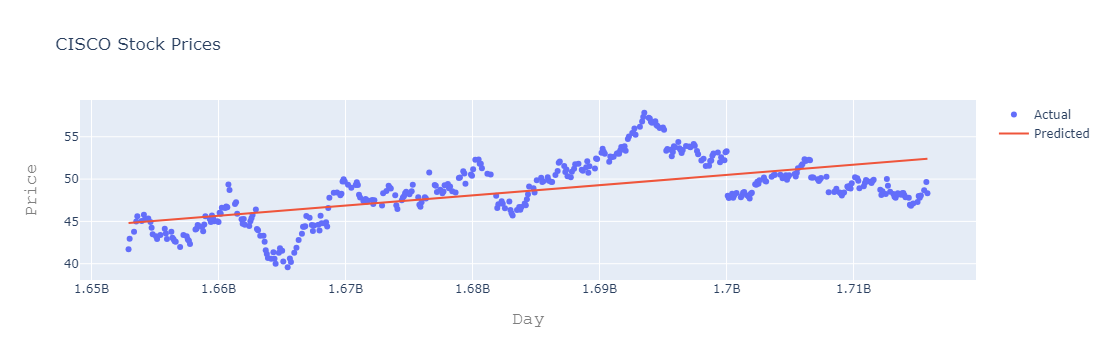

In [18]:
iplot(plot2)

In [ ]:
# Calculate scoress for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Ytrain,lm.predict(X_train))\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train,lm.predict))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(score)

In [41]:
# Calculate R-squared scores for training and testing sets
r2_train = r2_score(Y_train, lm.predict(X_train))
r2_test = r2_score(Y_test, lm.predict(X_test))

# Calculate Mean Squared Error for training and testing sets
mse_train = mse(Y_train, lm.predict(X_train))
mse_test = mse(Y_test, lm.predict(X_test))

# Format the scores into a readable string
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{str(r2_train).center(20)}{str(r2_test).center(20)}
{'MSE'.ljust(10)}{str(mse_train).center(20)}{str(mse_test).center(20)}
'''

# Print the formatted scores
print(scores)


Metric           Train                Test        
r2_score   0.3696444968865261 0.42846188074534686 
MSE         8.24496861958342   7.485255892609668  

